In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/train_loan (1).csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [6]:
data['Gender'].mode()

,Gender
0,Male


In [7]:
data['Gender']=data['Gender'].fillna('Male')

In [8]:
data['Married'].mode()

,Married
0,Yes


In [9]:
data['Married']=data['Married'].fillna('Yes')

In [10]:
data['Dependents'].mode()

,Dependents
0,0


In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents']=data['Dependents'].fillna('0')

In [13]:
data['Self_Employed'].mode()

,Self_Employed
0,No


In [14]:
data['Self_Employed']=data['Self_Employed'].fillna('No')


In [15]:
data['LoanAmount'].median()

128.0

In [16]:
data['LoanAmount']=data['LoanAmount'].fillna(128.0)

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <BarContainer object of 10 artists>)

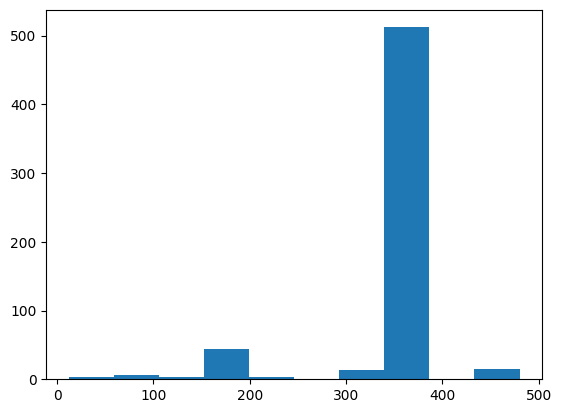

In [17]:
plt.hist(data['Loan_Amount_Term'])

In [18]:
data['Loan_Amount_Term'].median()

360.0

In [19]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(360.0)

In [20]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
data['Credit_History'].median()

1.0

In [22]:
data['Credit_History']=data['Credit_History'].fillna(1.0)

In [23]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [24]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [25]:
data['Dependents']=data['Dependents'].replace('3+',3)


In [26]:
data['Dependents']=data['Dependents'].astype(int)

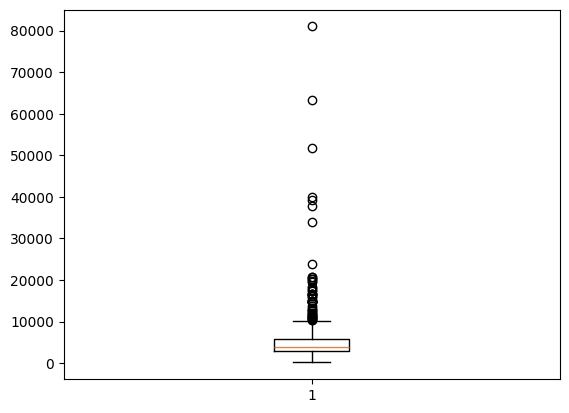

In [27]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

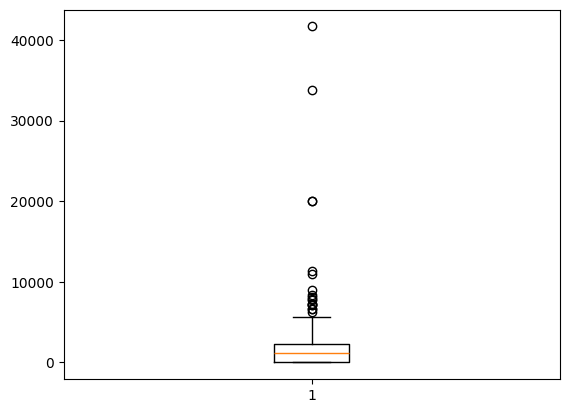

In [28]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = pd.DataFrame(encoder.fit_transform(data[['Gender','Married','Education','Self_Employed','Property_Area']]),
                           columns=encoder.get_feature_names_out(['Gender','Married','Education','Self_Employed','Property_Area']))

data = data.drop(['Gender','Married','Education','Self_Employed','Property_Area'], axis=1)
data = pd.concat([data, encoded_data], axis=1)

In [30]:
data=data.drop(['Loan_ID'],axis=1)


In [31]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [36]:
print('Accuracy_score=', accuracy_score(y_test,y_pred_dt))


Accuracy_score= 0.7073170731707317


In [37]:
print('Precision_score=', precision_score(y_test,y_pred_dt))
print('Recall_score=', recall_score(y_test,y_pred_dt))
print('F1_score=',f1_score(y_test,y_pred_dt))

Precision_score= 0.75
Recall_score= 0.825
F1_score= 0.7857142857142857


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred_rf)

0.7560975609756098

In [40]:
print('Precision_score=', precision_score(y_test,y_pred_rf))
print('Recall_score=', recall_score(y_test,y_pred_rf))
print('F1_score=',f1_score(y_test,y_pred_rf))

Precision_score= 0.75
Recall_score= 0.9375
F1_score= 0.8333333333333334


In [41]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [42]:
y_pred_bc=bc.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred_bc)

0.7317073170731707

In [44]:
print('Precision_score=', precision_score(y_test,y_pred_bc))
print('Recall_score=', recall_score(y_test,y_pred_bc))
print('F1_score=',f1_score(y_test,y_pred_bc))

Precision_score= 0.7473684210526316
Recall_score= 0.8875
F1_score= 0.8114285714285714


In [45]:
from sklearn.svm import SVC
svc=SVC()

In [46]:
Bagg_clf=BaggingClassifier(estimator=svc,n_estimators=100,random_state=42)
Bagg_clf.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [47]:
y_pred_Bagg_clf=Bagg_clf.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred_Bagg_clf)

0.6504065040650406

In [49]:
print('Precision_score=', precision_score(y_test,y_pred_Bagg_clf))
print('Recall_score=', recall_score(y_test,y_pred_Bagg_clf))
print('F1_score=',f1_score(y_test,y_pred_Bagg_clf))

Precision_score= 0.6504065040650406
Recall_score= 1.0
F1_score= 0.7881773399014779


In [50]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [51]:
y_pred_abc=abc.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred_abc)

0.7723577235772358

In [53]:
print('Precision_score=', precision_score(y_test,y_pred_abc))
print('Recall_score=', recall_score(y_test,y_pred_abc))
print('F1_score=',f1_score(y_test,y_pred_abc))

Precision_score= 0.76
Recall_score= 0.95
F1_score= 0.8444444444444444


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [55]:
y_pred_gbc=gbc.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred_gbc)

0.7642276422764228

In [57]:
print('Precision_score=',precision_score(y_test,y_pred_gbc))
print('Recall_score=', recall_score(y_test,y_pred_gbc))
print('F1_score=',f1_score(y_test,y_pred_gbc))

Precision_score= 0.7575757575757576
Recall_score= 0.9375
F1_score= 0.8379888268156425


In [58]:
import xgboost as xgb

In [59]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_xgb=xgb_model.predict(x_test)
from sklearn.metrics import accuracy_score


acc_score = accuracy_score(y_test, y_pred_xgb)
print('accuracy_score:', acc_score)

accuracy_score: 0.7317073170731707


In [61]:
print('Precision_score=',precision_score(y_test,y_pred_xgb))
print('Recall_score=', recall_score(y_test,y_pred_xgb))
print('F1_score=',f1_score(y_test,y_pred_xgb))

Precision_score= 0.7526881720430108
Recall_score= 0.875
F1_score= 0.8092485549132948


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
parameters={
    'max_depth':[10,50,60],
    'criterion':['gini','entropy'],
    'n_estimators':[50,100,200]
}

In [81]:
grid_search=GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv=5,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

In [82]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 60],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [86]:
print('Best params:',grid_search.best_params_)
print('Best score:',grid_search.best_score_)

Best params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 200}
Best score: 0.8064316635745208
